# Delhivery Feature Engineering

**Introduction:**

Delhivery, India's leading and rapidly growing integrated player, has set its sights on creating the commerce operating system. They achieve this by utilizing world-class infrastructure, ensuring the highest quality in logistics operations, and harnessing cutting-edge engineering and technology capabilities.

**From Delhivery’s Perspective:**
*  Delhivery aims to establish itself as the premier player in the logistics industry. This case study is of paramount importance as it aligns with the company's core objectives and operational excellence.
*  It provides a practical framework for understanding and processing data, which is integral to their operations. By leveraging data engineering pipelines and data analysis techniques, Delhivery can achieve several critical goals.
*  First, it allows them to ensure data integrity and quality by addressing missing values and structuring the dataset appropriately.
*  Second, it enables the extraction of valuable features from raw data, which can be utilized for building accurate forecasting models.
*  Moreover, it facilitates the identification of patterns, insights, and actionable recommendations crucial for optimizing their logistics operations.
*  By conducting hypothesis testing and outlier detection, Delhivery can refine their processes and further enhance the quality of service they provide. 

**Dataset:**

https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181


**Understanding the Dataset:**

1. data - tells whether the data is testing or training data
2. trip_creation_time – Timestamp of trip creation
3. route_schedule_uuid – Unique ID for a particular route schedule
4. route_type – Transportation type
   a. FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
   b. Carting: Handling system consisting of small vehicles (carts)
5. trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)
6. source_center - Source ID of trip origin
7. source_name - Source Name of trip origin
8. destination_cente – Destination ID
9. destination_name – Destination Name
10. od_start_time – Trip start time
11. od_end_time – Trip end time
12. start_scan_to_end_scan – Time taken to deliver from source to destination
13. is_cutoff – Unknown field
14. cutoff_factor – Unknown field
15. cutoff_timestamp – Unknown field
16. actual_distance_to_destination – Distance in kms between source and destination warehouse
17. actual_time – Actual time taken to complete the delivery (Cumulative)
18. osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
19. osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
20. factor – Unknown field
21. segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
22. segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
23. segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
24. segment_factor – Unknown field

## Importing Required Libraries

In [1]:
# Importing libraries -  
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
import warnings
warnings.simplefilter('ignore')

In [2]:
# Loading the dataset -
df=pd.read_csv('delhivery_data.csv')
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [3]:
# Display basic information about the dataset -
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [4]:
# Shape of the dataset -
print(f"Number of rows: {df.shape[0]:,} \nNumber of columns: {df.shape[1]}")

Number of rows: 144,867 
Number of columns: 24


In [5]:
# Number of unique values in each column -
for i in df.columns:
    print(i,':',df[i].nunique())

data : 2
trip_creation_time : 14817
route_schedule_uuid : 1504
route_type : 2
trip_uuid : 14817
source_center : 1508
source_name : 1498
destination_center : 1481
destination_name : 1468
od_start_time : 26369
od_end_time : 26369
start_scan_to_end_scan : 1915
is_cutoff : 2
cutoff_factor : 501
cutoff_timestamp : 93180
actual_distance_to_destination : 144515
actual_time : 3182
osrm_time : 1531
osrm_distance : 138046
factor : 45641
segment_actual_time : 747
segment_osrm_time : 214
segment_osrm_distance : 113799
segment_factor : 5675


* From above observation, we can conclude that only data and route type are categorical remaining are countinous and date time column

### Converting time columns into pandas datetime and object to category.

In [6]:
# Converting data type of datetime column to object to datetime 
columns = ['trip_creation_time', 'od_start_time','od_end_time','cutoff_timestamp']
for i in columns:
    df[i] = pd.to_datetime(df[i])
    
    
#Changing the data type of columns with 'object' data type to 'category', since it can do memory optimization 
columns = ['data','route_type', 'is_cutoff']
for i in columns:
    df = df.astype({i : 'category'})

### Missing values and Outlier detection

In [7]:
df.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

* There are null values in source center and destination name we can remove them it doesn't make any difference 

### Removing null values

In [8]:
df.dropna(how='any',inplace=True)

In [9]:
df.describe().round(2)

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144316.00,144316.00,144316.00,144316.00,144316.00,144316.00,144316.00,144316.00,144316.00,144316.00,144316.00
mean,963.70,233.56,234.71,418.00,214.44,285.55,2.12,36.18,18.50,22.82,2.22
std,1038.08,345.25,345.48,598.94,308.45,421.72,1.72,53.52,14.77,17.87,4.85
min,20.00,9.00,9.00,9.00,6.00,9.01,0.14,-244.00,0.00,0.00,-23.44
25%,161.00,22.00,23.35,51.00,27.00,29.90,1.60,20.00,11.00,12.05,1.35
50%,451.00,66.00,66.14,132.00,64.00,78.62,1.86,28.00,17.00,23.51,1.68
75%,1645.00,286.00,286.92,516.00,259.00,346.31,2.21,40.00,22.00,27.81,2.25
max,7898.00,1927.00,1927.45,4532.00,1686.00,2326.20,77.39,3051.00,1611.00,2191.40,574.25


**Insights:**

**Travel Time and Distance:**
- The average actual_time is approximately 418 seconds (about 7 minutes), with a wide range (standard deviation of 599 seconds).
- The average actual_distance_to_destination is around 235 kms, with a standard deviation of 345 kms.
- The average osrm_time is about 214 seconds, and the average osrm_distance is approximately 286 km.

**Factors and Ratios:**
- The average factor is approximately 2.12, suggesting that, on average, the actual_time is more than twice the osrm_time.
- The average segment_factor is around 2.22, suggesting that, on average, the segment's actual time is more than twice the segment OSRM time.
- The cutoff_factor has an average of 233.56, indicating a cutoff time that is, on average, 233.56 times longer than the start-to-end scan time.

**Minimum and Maximum Values:**

- The minimum values for start_scan_to_end_scan, actual_distance_to_destination, and osrm_distance are relatively small, suggesting that some trips have very short distances or times.
- The maximum values for start_scan_to_end_scan, actual_distance_to_destination, osrm_time, and osrm_distance are much larger, indicating that some trips have very long durations or cover significant distances.

### Since delivery details of one package is divided into several rows we will try merge some columns 

In [10]:
df['segment_key'] = df['trip_uuid'] + df['source_center'] + df['destination_center']

segment_col = ['segment_actual_time','segment_osrm_distance','segment_osrm_time']
for i in segment_col:
    df[i+'_sum'] = df.groupby(['segment_key'])[i].cumsum()
df[[i+'_sum' for i in segment_col]]

,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,14.0,11.9653,11.0
1,24.0,21.7243,20.0
2,40.0,32.5395,27.0
3,61.0,45.5619,39.0
4,67.0,49.4772,44.0
...,...,...,...
144862,92.0,65.3487,94.0
144863,118.0,82.7212,115.0
144864,138.0,103.4265,149.0
144865,155.0,122.3150,176.0


In [11]:
# Display basic information about the dataset -
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144316 entries, 0 to 144866
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  category      
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  category      
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetim

### Grouping by segment


In [12]:
# The grouping is performed for easier analysis and comparison of relevant data within each segment -

create_segment_dict = {

    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',


    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',

    'osrm_time' : 'last',
    'osrm_distance' : 'last',

    'segment_actual_time_sum' : 'last',
    'segment_osrm_distance_sum' : 'last',
    'segment_osrm_time_sum' : 'last',

    }
segment = df.groupby('segment_key').agg(create_segment_dict).reset_index()
segment = segment.sort_values(by=['segment_key','od_end_time'], ascending=True).reset_index(drop=True)
segment.head()

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0
1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0
2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0
3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0
4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0


In [13]:
# Here all the rows are at trip_uuid we have grouped all the rows to trip_uuid level -
segment[segment['trip_uuid']=='trip-153671041653548748']

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0
1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0


In [14]:
# Display basic information about the segment -
segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26222 entries, 0 to 26221
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   segment_key                     26222 non-null  object        
 1   data                            26222 non-null  category      
 2   trip_creation_time              26222 non-null  datetime64[ns]
 3   route_schedule_uuid             26222 non-null  object        
 4   route_type                      26222 non-null  category      
 5   trip_uuid                       26222 non-null  object        
 6   source_center                   26222 non-null  object        
 7   source_name                     26222 non-null  object        
 8   destination_center              26222 non-null  object        
 9   destination_name                26222 non-null  object        
 10  od_start_time                   26222 non-null  datetime64[ns]
 11  od

### Calculate time taken between od_start_time and od_end_time

In [15]:
segment['od_time_diff_hour'] = ((segment['od_end_time'] - segment['od_start_time']).dt.total_seconds()/3600).round(3)
segment['od_time_diff_hour'].describe()

count    26222.000000
mean         4.984203
std          7.351938
min          0.345000
25%          1.516000
50%          2.539000
75%          5.121500
max        131.643000
Name: od_time_diff_hour, dtype: float64

#### The 'od_time_diff_hour' column in the 'segment' DataFrame represents the time difference between the start and end of a trip in hours. Here are some insights based on the descriptive statistics:

* **Count:** There are 26,222 non-null entries in the 'od_time_diff_hour' column, indicating that there are no missing values.

* **Mean:** The average time difference between the start and end of trips is approximately 4.98 hours. This gives a general idea of the typical duration of trips.

* **Minimum:** The minimum time difference is 0.345 hours, suggesting that there are very short trips in the dataset.

* **Median (50th Percentile):** The median time difference is 2.539 hours, representing the middle value in the dataset. This indicates that half of the trips have a duration of 2.539 hours or less.

* **Maximum:** The maximum time difference is 131.643 hours, indicating that there are some trips with exceptionally long durations.

**Insight:**
* The descriptive statistics suggest that the majority of trips have relatively short durations, with a median of 2.539 hours. However, there is considerable variability, with some trips lasting much longer, as indicated by the high standard deviation and the presence of trips with durations exceeding 100 hours.



## Split and extract features out of destination and source. City-place-code (State)

In [16]:
# Extracting city, place, code, state

def city_name(x):
    city = x.split('_')[0]
    return city

def place_name(x):
    parts = x.split('_')[1:]
    return parts[0] if len(parts) > 0 else None

def code_name(x):
    parts = x.split('_')[2:]
    return parts[0].split('(')[0] if len(parts) > 0 else None

def state_name(x):
    state = x.split('(')[1]
    return state[:-1]

segment['destination_state'] = segment['destination_name'].apply(state_name)
segment['destination_city'] = segment['destination_name'].apply(city_name)
segment['destination_place'] = segment['destination_name'].apply(place_name)
segment['destination_code'] = segment['destination_name'].apply(code_name)

segment['source_state'] = segment['source_name'].apply(state_name)
segment['source_city'] = segment['source_name'].apply(city_name)
segment['source_place'] = segment['source_name'].apply(place_name)
segment['source_code'] = segment['source_name'].apply(code_name)


### Finding out top destination name

In [17]:
# Finding out top destination name -

from IPython.display import display
destination_column = ['destination_state','destination_city','destination_place','destination_code']
for i in destination_column:
    print(f'Top 5 {i}')
    display(segment[i].value_counts().head(5))
    print('**'*10)

Top 5 destination_state


Karnataka        3497
Maharashtra      3473
Tamil Nadu       2111
Haryana          2014
Uttar Pradesh    1828
Name: destination_state, dtype: int64

********************
Top 5 destination_city


Bengaluru    1180
Mumbai       1000
Gurgaon       986
Bangalore     683
Hyderabad     643
Name: destination_city, dtype: int64

********************
Top 5 destination_place


Central     1860
Bilaspur     971
Nelmngla     665
Mankoli      614
Shamshbd     464
Name: destination_place, dtype: int64

********************
Top 5 destination_code


D      9156
H      2918
HB     2737
I      1980
IP      948
Name: destination_code, dtype: int64

********************


In [18]:
print('Total number of unique destination_state:',segment['destination_state'].nunique())
print('Total number of unique destination_city:' ,segment['destination_city'].nunique())
print('Total number of unique destination_place:',segment['destination_place'].nunique())
print('Total number of unique destination_code:' ,segment['destination_code'].nunique())

Total number of unique destination_state: 32
Total number of unique destination_city: 1256
Total number of unique destination_place: 1154
Total number of unique destination_code: 27


In [19]:
print(segment['destination_state'].unique())

['Haryana' 'Uttar Pradesh' 'Karnataka' 'Punjab' 'Maharashtra' 'Tamil Nadu'
 'Gujarat' 'Delhi' 'Andhra Pradesh' 'Telangana' 'Rajasthan'
 'Madhya Pradesh' 'Assam' 'West Bengal' 'Chandigarh'
 'Dadra and Nagar Haveli' 'Orissa' 'Uttarakhand' 'Bihar' 'Jharkhand'
 'Pondicherry' 'Goa' 'Himachal Pradesh' 'Kerala' 'Arunachal Pradesh'
 'Mizoram' 'Chhattisgarh' 'Jammu & Kashmir' 'Meghalaya' 'Nagaland'
 'Tripura' 'Daman & Diu']


In [20]:
print(segment['destination_place'].unique())

['Bilaspur' 'Central' 'ShntiSgr' ... 'AnadiDPP' 'ArickDPP' 'VrdhriRD']


In [21]:
print(segment['destination_code'].unique())

['HB ' 'H' 'D ' 'H ' 'IP ' None 'Dc ' 'DC ' 'I' 'D' 'I ' 'DPP' 'DPC ' 'L '
 'Nagar' 'PC ' 'Pc ' 'RPC ' 'P ' 'GW ' 'Gateway ' 'R' 'INT ' 'M ' 'C ' 'L'
 'Layout' 'CP ']


In [22]:
print(segment['destination_city'].unique())

['Gurgaon' 'Kanpur' 'Chikblapur' ... 'Ranaghat' 'Kapadvanj' 'Lunawada']


### Finding out top source name

In [23]:
# Finding out top source name -

source_column = ['source_state','source_city','source_place','source_code']
for i in source_column:
    print(f'Top 5 {i}')
    display(segment[i].value_counts().head(5))
    print('**'*10)

Top 5 source_state


Maharashtra      3565
Karnataka        3445
Tamil Nadu       2130
Haryana          2039
Uttar Pradesh    1818
Name: source_state, dtype: int64

********************
Top 5 source_city


Bengaluru    1136
Gurgaon      1130
Bhiwandi      821
Bangalore     792
Mumbai        719
Name: source_city, dtype: int64

********************
Top 5 source_place


Central     1976
Bilaspur    1074
Mankoli      821
Nelmngla     769
Bomsndra     468
Name: source_place, dtype: int64

********************
Top 5 source_code


D      9139
HB     3520
H      2910
I      1761
H       760
Name: source_code, dtype: int64

********************


In [24]:
print('Total number of unique source_state:',segment['source_state'].nunique())
print('Total number of unique source_city:' ,segment['source_city'].nunique())
print('Total number of unique source_place:',segment['source_place'].nunique())
print('Total number of unique source_code:' ,segment['source_code'].nunique())

Total number of unique source_state: 31
Total number of unique source_city: 1260
Total number of unique source_place: 1177
Total number of unique source_code: 24


In [25]:
print(segment['source_state'].unique())

['Uttar Pradesh' 'Madhya Pradesh' 'Karnataka' 'Haryana' 'Maharashtra'
 'Tamil Nadu' 'Gujarat' 'Delhi' 'Telangana' 'Andhra Pradesh' 'Rajasthan'
 'Assam' 'West Bengal' 'Punjab' 'Chandigarh' 'Goa' 'Uttarakhand'
 'Jharkhand' 'Pondicherry' 'Orissa' 'Himachal Pradesh' 'Kerala'
 'Arunachal Pradesh' 'Bihar' 'Meghalaya' 'Chhattisgarh' 'Jammu & Kashmir'
 'Dadra and Nagar Haveli' 'Mizoram' 'Tripura' 'Nagaland']


In [26]:
print(segment['source_place'].unique())

['Central' 'Trnsport' 'ChikaDPP' ... 'Bhaluahi' 'Thikiri' 'RajpurRD']


In [27]:
print(segment['source_city'].unique())

['Kanpur' 'Bhopal' 'Doddablpur' ... 'Mahasamund' 'Badkulla' 'Kapadvanj']


In [28]:
print(segment['source_code'].unique())

['H' 'H ' 'D ' 'I ' 'HB ' None 'DPC ' 'D' 'I' 'IP ' 'DPP' 'DC ' 'L ' 'M '
 'RP ' 'Pc ' 'PC ' 'C ' 'V ' 'CP ' 'R' 'Nagar' 'Dc ' 'P ' 'L']


**Insights:**
* Busiest Route route with the highest number of trips is from `Karnataka` to `Maharashtra`, with 3497 trips.
* Popular Route to the destination place `Central` appears to be popular, with 1860 trips.
* Bengaluru is the main source city and destination city more numbers of orders are dispatched in bengaluru
* Most number of orders are placed in central Bilaspur and Nelmngla in Bengaluru. We can conculde that Bengaluru is the main hub for transportation.


### Trip_creation_time

In [29]:
# Trip_creation_time -

segment['trip_month'] = segment['trip_creation_time'].dt.month
segment['trip_year'] = segment['trip_creation_time'].dt.year
segment['trip_day'] = segment['trip_creation_time'].dt.day
segment['trip_week'] = segment['trip_creation_time'].dt.week
segment['trip_day_name'] = segment['trip_creation_time'].dt.day_name()

In [30]:
source_column = ['trip_year','trip_month','trip_week','trip_day_name','trip_day']
for i in source_column:
    print(f'Top {i}')
    display(segment[i].value_counts().head(7))
    print('**'*12)

Top trip_year


2018    26222
Name: trip_year, dtype: int64

************************
Top trip_month


9     23054
10     3168
Name: trip_month, dtype: int64

************************
Top trip_week


38    8852
39    7905
37    6297
40    3168
Name: trip_week, dtype: int64

************************
Top trip_day_name


Wednesday    4819
Thursday     3795
Friday       3718
Tuesday      3708
Saturday     3591
Monday       3492
Sunday       3099
Name: trip_day_name, dtype: int64

************************
Top trip_day


18    1373
21    1358
13    1320
20    1319
25    1319
14    1296
15    1293
Name: trip_day, dtype: int64

************************


**Insights:**
* Busiest Year: The dataset primarily consists of trips from the year 2018, with all 26,222 trips recorded during that year.
* Busiest Month: September (Month 9) stands out as the busiest month, with a significant number of trips recorded (23,054 trips). October (Month 10) follows with a comparatively smaller number of trips (3,168).
* Busiest Week: Week 38 appears to be the busiest week, accounting for 8,852 trips. The subsequent weeks 39, 37, and 40 also exhibit high activity with 7,905, 6,297, and 3,168 trips, respectively.
* Busiest Day of the Week: Wednesday is identified as the busiest day of the week, with 4,819 trips. Thursday and Friday closely follow with 3,795 and 3,718 trips, respectively.
* Busiest Day: The 18th day of the month is the busiest, recording 1,373 trips. Days 21, 13, 20, and 25 also exhibit high activity with similar trip counts.


## Grouping and Aggregating at Trip-level

In [31]:
#  Groups the segment data by the trip_uuid column to focus on aggregating data at the trip level -

create_trip_dict = { 
    
    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',
    'od_time_diff_hour' : 'sum',
    'start_scan_to_end_scan' : 'first',


    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',

    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',

    'segment_actual_time_sum' : 'sum',
    'segment_osrm_distance_sum' : 'sum',
    'segment_osrm_time_sum' : 'sum',
}

trip = segment.groupby('trip_uuid').agg(create_trip_dict).reset_index(drop=True)
trip.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_time_diff_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),37.668,1260.0,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),3.027,58.0,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),65.573,834.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),1.675,100.0,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),11.973,152.0,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0


In [32]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            14787 non-null  category      
 1   trip_creation_time              14787 non-null  datetime64[ns]
 2   route_schedule_uuid             14787 non-null  object        
 3   route_type                      14787 non-null  category      
 4   trip_uuid                       14787 non-null  object        
 5   source_center                   14787 non-null  object        
 6   source_name                     14787 non-null  object        
 7   destination_center              14787 non-null  object        
 8   destination_name                14787 non-null  object        
 9   od_time_diff_hour               14787 non-null  float64       
 10  start_scan_to_end_scan          14787 non-null  float64       
 11  ac

In [33]:
#  We have aggregated all the rows to now trip level for one trip id we will get following result -
trip[trip['trip_uuid'] == 'trip-153741093647649320'].T

,5917
data,training
trip_creation_time,2018-09-20 02:35:36.476840
route_schedule_uuid,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...
route_type,Carting
trip_uuid,trip-153741093647649320
source_center,IND388121AAA
source_name,Anand_VUNagar_DC (Gujarat)
destination_center,IND388320AAA
destination_name,Anand_Vaghasi_IP (Gujarat)
od_time_diff_hour,3.257


In [34]:
# we will compare now distribution of actual time and segment actual time sum -
trip[['actual_time','segment_actual_time_sum']].head(10)

,actual_time,segment_actual_time_sum
0,1562.0,1548.0
1,143.0,141.0
2,3347.0,3308.0
3,59.0,59.0
4,341.0,340.0
5,61.0,60.0
6,24.0,24.0
7,64.0,64.0
8,161.0,161.0
9,23.0,23.0


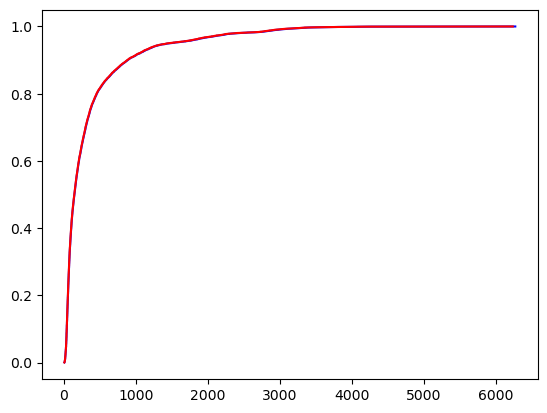

In [35]:
# we will plot empirical cumulative distribution function to see how the curve is looking -
from statsmodels.distributions.empirical_distribution import ECDF
e1=ECDF(trip['actual_time'])
e2=ECDF(trip['segment_actual_time_sum'])
plt.plot(e1.x,e1.y,c='b')
plt.plot(e2.x,e2.y,c='r')

* Here the distance is very small we can't see also this both actual time and segment actual time sum belong to same distribution


### hypothesis testing between actual_time and segment_actual_time_sum

corr_coefficient :  1.0
p_value :  0.0
Reject the null hypothesis: There is strong correlation between the two variables 


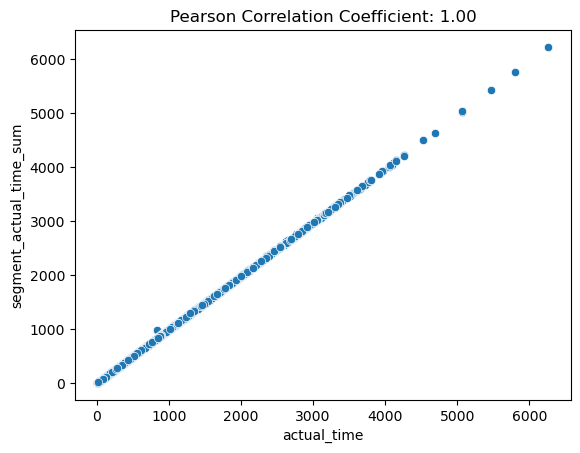

In [36]:
# Null Hypothesis (H0) : There is no correlation between the two variables
# Alternate hypothesis (Ha) : There is strong correlation between the two variables

# Calculate the Pearson correlation coefficient
corr_coefficient,p_value =  pearsonr(trip['actual_time'], trip['segment_actual_time_sum'])
print("corr_coefficient : ",corr_coefficient.round(4))
print("p_value : ",p_value.round(4))

# Set a significance level (alpha=0.05)
alpha = 0.05
# Decision based on p-value
if p_value <= alpha:
    print("Reject the null hypothesis: There is strong correlation between the two variables ")
else:
    print("Fail to reject the null hypothesis: There is no correlation between the two variables")

# Create a scatter plot with a regression line
sns.scatterplot(x='actual_time', y='segment_actual_time_sum', data=trip)

# Display the correlation coefficient on the plot
plt.title(f'Pearson Correlation Coefficient: {corr_coefficient:.2f}')
plt.show()

**Insights:**

The Pearson correlation coefficient (`r`) you obtained is approximately 1, and the p-value is 0.0. Here's what this information means:

*  **Pearson Correlation Coefficient (`r`):**
   - The value of `r` close to 1 indicates a strong positive linear relationship between the 'actual_time' and 'segment_actual_time_sum' columns. In other words, as one variable increases, the other tends to increase proportionally.

* **P-value:**
   - The p-value being 0.0 suggests that the observed correlation is statistically significant. In hypothesis testing, a low p-value (typically below a significance level like 0.05) indicates that you can reject the null hypothesis. In this context, the null hypothesis would be that there is no correlation between the two variables.


<!-- fig,axs = plt.subplots(nrows=3,ncols=3,figsize=(20,5))
fig.subplots_adjust(top=2.3)

count = 0
for i in range(3):
    for j in range(3):
        sns.boxplot(data=trip,y=num_cols[count],ax=axs[i,j])
        axs[i,j].set_title(f'{num_cols[count]}')
        count += 1
plt.show()
trip[num_cols].boxplot(rot=25,figsize=(25,8)) -->

### Visualize the outlier values using Boxplot.


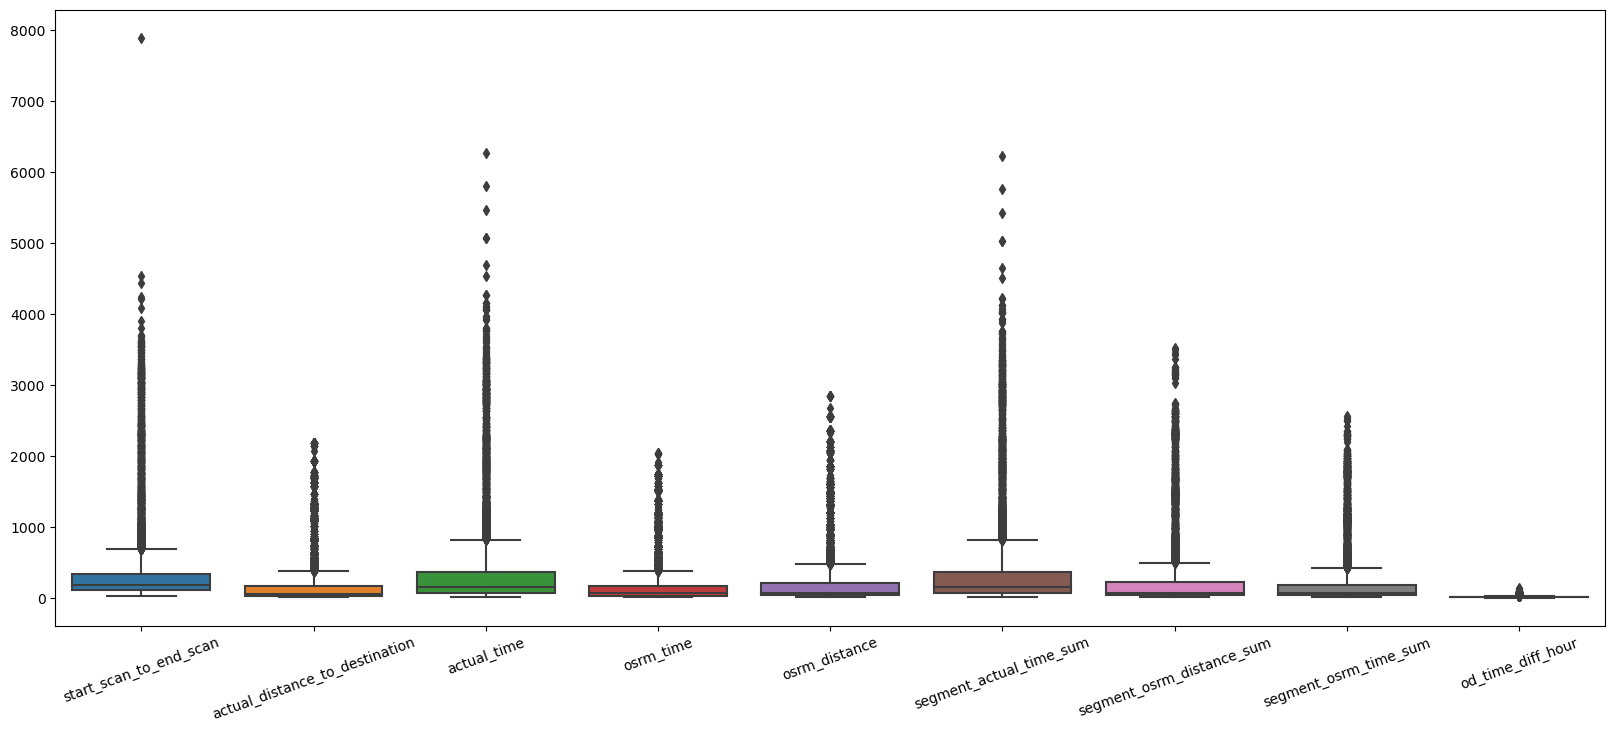

In [37]:
# Plotting boxplot for continuous column to see the outliers - 

num_cols = ['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time',
            'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_distance_sum',
            'segment_osrm_time_sum', 'od_time_diff_hour']

plt.figure(figsize=(20,8))
sns.boxplot(data=trip[num_cols])
plt.xticks(rotation=20)
plt.show()

* Here we can see that in almost all the columns there outlier vaules 

In [38]:
Q1 = trip[num_cols].quantile(0.25)
Q3 = trip[num_cols].quantile(0.75)
IQR = Q3 - Q1
print(f'Q1 \n{Q1}')
print('**'*10)
print(f'\nQ3 \n{Q3}')
print('**'*10)
print(f'\nIQR \n{IQR}')

Q1 
start_scan_to_end_scan            104.000000
actual_distance_to_destination     22.777099
actual_time                        67.000000
osrm_time                          29.000000
osrm_distance                      30.756900
segment_actual_time_sum            66.000000
segment_osrm_distance_sum          32.578850
segment_osrm_time_sum              30.000000
od_time_diff_hour                   2.495000
Name: 0.25, dtype: float64
********************

Q3 
start_scan_to_end_scan            334.000000
actual_distance_to_destination    163.591258
actual_time                       367.000000
osrm_time                         168.000000
osrm_distance                     206.644200
segment_actual_time_sum           364.000000
segment_osrm_distance_sum         216.560600
segment_osrm_time_sum             184.000000
od_time_diff_hour                  10.559000
Name: 0.75, dtype: float64
********************

IQR 
start_scan_to_end_scan            230.000000
actual_distance_to_destination    

In [39]:
lower_bond = Q1 - 1.5*IQR
upper_bond = Q3 + 1.5*IQR
print(f'Lower Bond \n{lower_bond}')
print('**'*10)
print(f'\nUpper Bond \n{upper_bond}')

Lower Bond 
start_scan_to_end_scan           -241.000000
actual_distance_to_destination   -188.444140
actual_time                      -383.000000
osrm_time                        -179.500000
osrm_distance                    -233.074050
segment_actual_time_sum          -381.000000
segment_osrm_distance_sum        -243.393775
segment_osrm_time_sum            -201.000000
od_time_diff_hour                  -9.601000
dtype: float64
********************

Upper Bond 
start_scan_to_end_scan            679.000000
actual_distance_to_destination    374.812497
actual_time                       817.000000
osrm_time                         376.500000
osrm_distance                     470.475150
segment_actual_time_sum           811.000000
segment_osrm_distance_sum         492.533225
segment_osrm_time_sum             415.000000
od_time_diff_hour                  22.655000
dtype: float64


In [40]:
# Removing Outilers -

trip = trip[~((trip[num_cols]<lower_bond )| (trip[num_cols] > upper_bond)).any(axis=1)]
trip.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_time_diff_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),3.027,58.0,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),1.675,100.0,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),11.973,152.0,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0
5,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,trip-153671055416136166,IND600056AAA,Chennai_Poonamallee (Tamil Nadu),IND600056AAA,Chennai_Poonamallee (Tamil Nadu),3.175,60.0,24.597048,61.0,23.0,28.0647,60.0,28.0647,23.0
6,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,trip-153671066201138152,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),1.633,98.0,9.100510,24.0,13.0,12.0184,24.0,12.0184,13.0


In [41]:
# shape of the data set after removing outliers -
print(trip.shape)

(12369, 18)


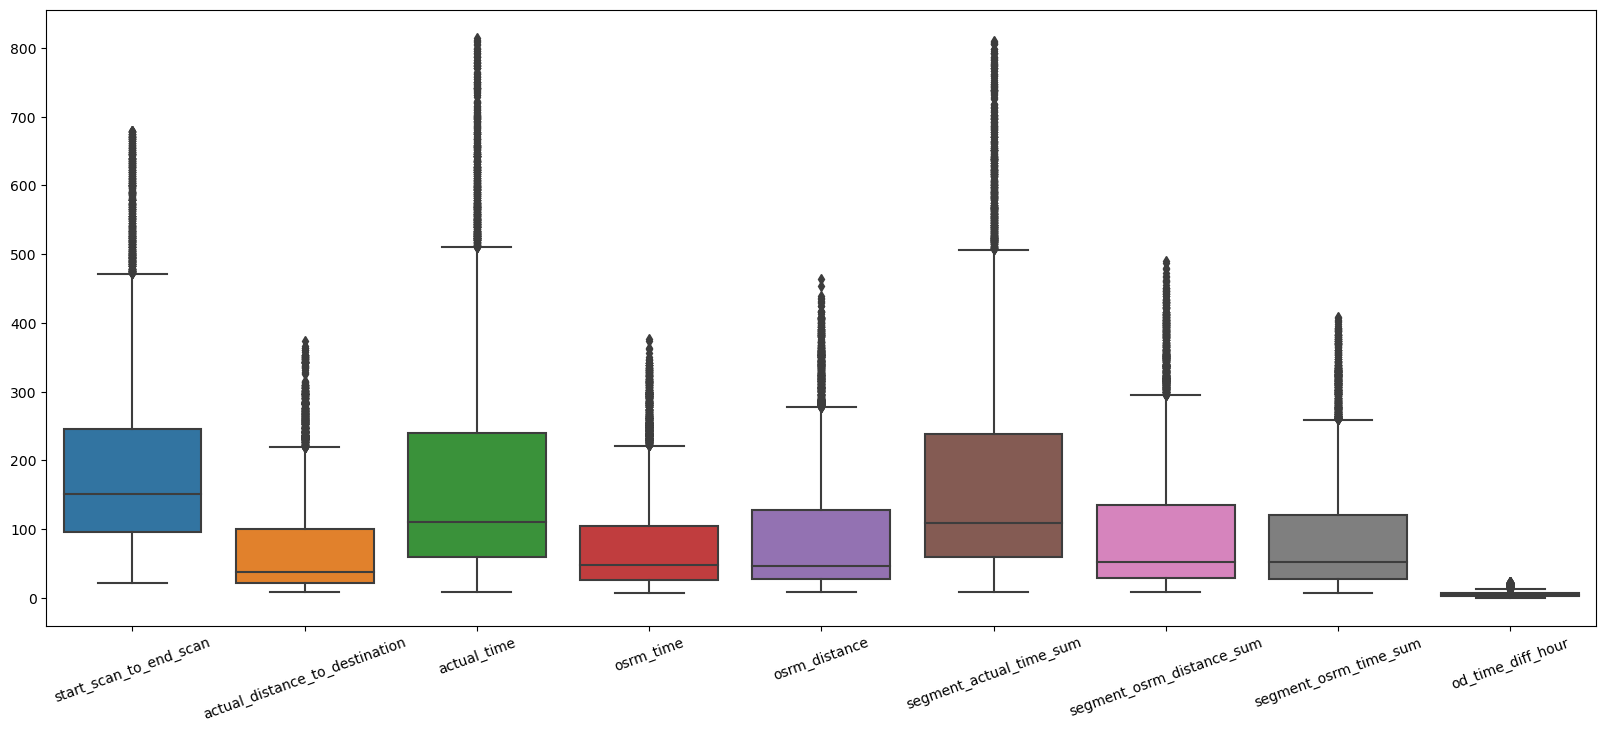

In [42]:
# After removing outliers -
plt.figure(figsize=(20,8))
sns.boxplot(data=trip[num_cols])
plt.xticks(rotation=20)
plt.show()

* After removing the outliers value still we can see the outlier in almost all column. Here removing outlier is not ideal soltuion we can say that.

### Handling Categorical Variables

* There are only two categorical columns are there and they are data and route_type

Axes(0.125,0.11;0.775x0.77)
training    8827
test        3542
Name: data, dtype: int64


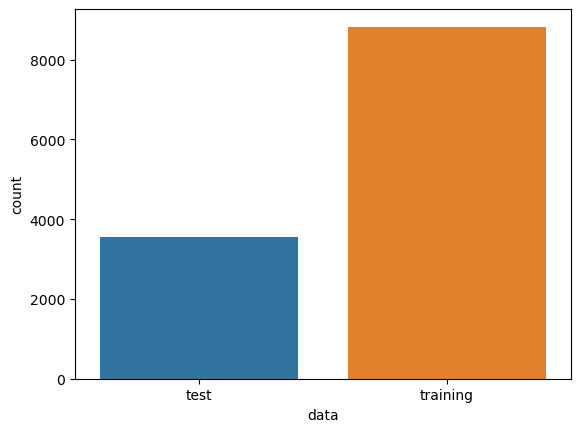

In [43]:
print(sns.countplot(data=trip,x='data'))
print(trip['data'].value_counts())
plt.show()

Axes(0.125,0.11;0.775x0.77)
Carting    8713
FTL        3656
Name: route_type, dtype: int64


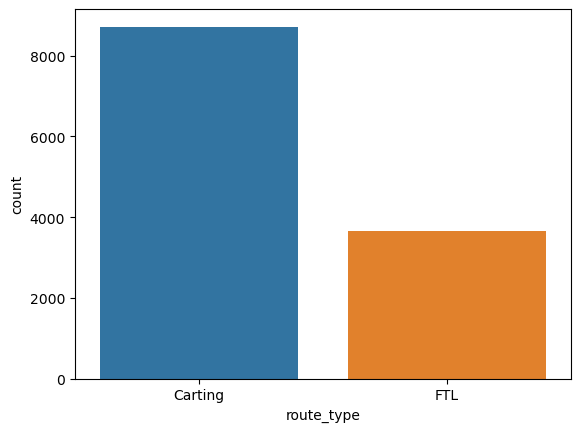

In [44]:
print(sns.countplot(data=trip,x='route_type'))
print(trip['route_type'].value_counts())
plt.show()

- FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
- Carting: Handling system consisting of small vehicles (carts)


**Insight**
* The 'data' column has two unique values: 'training' and 'test'. The majority of the data falls into the 'training' category with 8827 instances. The 'test' category has 3542 instances.
* The 'route_type' column has two unique values: 'Carting' and 'FTL'. The majority of the trips have a 'route_type' of 'Carting' with 8713 instances. There are fewer instances with a 'route_type' of 'FTL', totaling 3656 instances.

##  Perform one-hot encoding on categorical features.

In [45]:
trip['data'] = trip['data'].replace({'test':0,'training':1})
trip['route_type'] = trip['route_type'].replace({'Carting':0,'FTL':1})

## Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.

In [46]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### Normalizations -


In [47]:
# Normalizations -
ab = trip
min_max_scaler = MinMaxScaler()
ab[num_cols] = min_max_scaler.fit_transform(ab[num_cols])
ab[num_cols].describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
count,12369.000000,12369.000000,12369.000000,12369.000000,12369.000000,12369.000000,12369.000000,12369.000000,12369.000000
mean,0.255579,0.167571,0.200515,0.187526,0.175424,0.199743,0.178741,0.191156,0.210663
std,0.197460,0.192632,0.187523,0.191060,0.191531,0.187388,0.192158,0.194576,0.178298
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.112633,0.033645,0.063275,0.051491,0.041657,0.062422,0.041732,0.049875,0.083262
50%,0.196347,0.077779,0.126551,0.111111,0.082929,0.124844,0.090834,0.112219,0.152940
75%,0.340944,0.251369,0.286600,0.262873,0.261191,0.285893,0.263253,0.281796,0.282084
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Insights:**

* The min-max scaling has transformed the numerical columns to a common scale (0 to 1). This is particularly useful when the features in our dataset have different ranges, and you want to ensure that each feature contributes equally to the analysis.
* The minimum value for all columns is 0, and the maximum value is 1, as expected in a Min-Max scaling.
* The mean and standard deviation of the columns have changed due to scaling. The mean for each column is now centered around 0.5, and the standard deviation reflects the spread of values within the scaled range.

### standardization 

In [48]:
# standardization -
ba = trip
standard = StandardScaler()
ba[num_cols] = standard.fit_transform(ba[num_cols])
ba[num_cols].describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
count,1.236900e+04,1.236900e+04,1.236900e+04,1.236900e+04,1.236900e+04,1.236900e+04,1.236900e+04,1.236900e+04,1.236900e+04
mean,6.204108e-17,8.501926e-17,1.976123e-16,-1.953145e-16,7.582799e-17,-4.595636e-17,-1.148909e-17,9.880617e-17,-2.024952e-16
std,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00
min,-1.294388e+00,-8.699409e-01,-1.069325e+00,-9.815439e-01,-9.159362e-01,-1.065975e+00,-9.302128e-01,-9.824639e-01,-1.181572e+00
25%,-7.239542e-01,-6.952732e-01,-7.318846e-01,-7.120339e-01,-6.984315e-01,-7.328453e-01,-7.130304e-01,-7.261249e-01,-7.145694e-01
50%,-2.999829e-01,-4.661535e-01,-3.944439e-01,-3.999697e-01,-4.829410e-01,-3.997157e-01,-4.574911e-01,-4.057012e-01,-3.237604e-01
75%,4.323311e-01,4.350315e-01,4.590826e-01,3.943756e-01,4.478181e-01,4.597587e-01,4.398272e-01,4.658514e-01,4.005860e-01
max,3.770141e+00,4.321525e+00,4.263561e+00,4.252624e+00,4.305349e+00,4.270762e+00,4.274051e+00,4.157133e+00,4.427256e+00


## Hypothesis Testing:

### a. actual_time aggregated value and OSRM time aggregated value.


In [49]:
# Null hypothesis (H0) : The mean actual_time is equal to the mean OSRM time.
# Alternate hypothesis (Ha): The mean actual_time is not equal to the mean OSRM time

t_stat, p_value = ttest_ind(trip['actual_time'], trip['osrm_time'])

# Print the results
print(f'T-Statistic value : {t_stat.round(4)} \nP-value {p_value.round(4)}')

# Set a significance level (alpha=0.05)
alpha = 0.05
# Decision based on p-value
if p_value <= alpha:
    print("Reject the null hypothesis: The mean actual_time is not equal to the mean OSRM time ")
else:
    print("Fail to reject the null hypothesis: The mean actual_time is equal to the mean OSRM time.")

T-Statistic value : 0.0 
P-value 1.0
Fail to reject the null hypothesis: The mean actual_time is equal to the mean OSRM time.


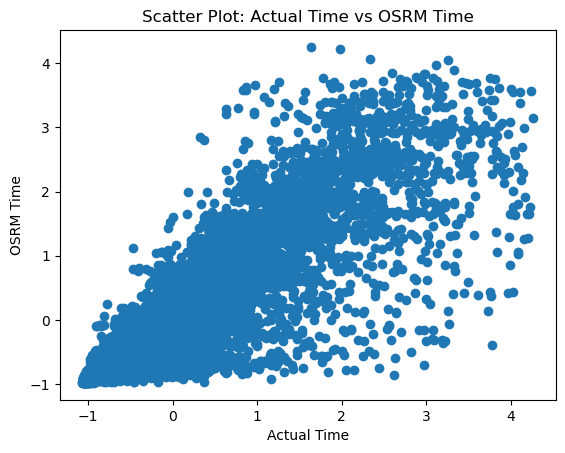

In [50]:
plt.scatter(trip['actual_time'], trip['osrm_time'])
plt.xlabel('Actual Time')
plt.ylabel('OSRM Time')
plt.title('Scatter Plot: Actual Time vs OSRM Time')
plt.show()

* Here means between them Actual time and osrm time is same we don't have enough evidence reject null hypothesis. According scatter plot we can say the distribution between them is different

### b. actual_time aggregated value and segment actual time aggregated value.

In [51]:
# Null hypothesis (H0) : The mean actual_time is equal to the mean segment actual time time.
# Alternate hypothesis (Ha): The mean actual_time is not equal to the mean segment actual time time

t_stat, p_value = ttest_ind(trip['actual_time'], trip['segment_actual_time_sum'])

# Print the results
print(f'T-Statistic value : {t_stat.round(4)} \nP-value {p_value.round(4)}')

# Set a significance level (alpha=0.05)
alpha = 0.05
# Decision based on p-value
if p_value <= alpha:
    print("Reject the null hypothesis: The mean actual_time is not equal to the mean segment actual time time ")
else:
    print("Fail to reject the null hypothesis: The mean actual_time is equal to the mean segment actual time time.")


T-Statistic value : 0.0 
P-value 1.0
Fail to reject the null hypothesis: The mean actual_time is equal to the mean segment actual time time.


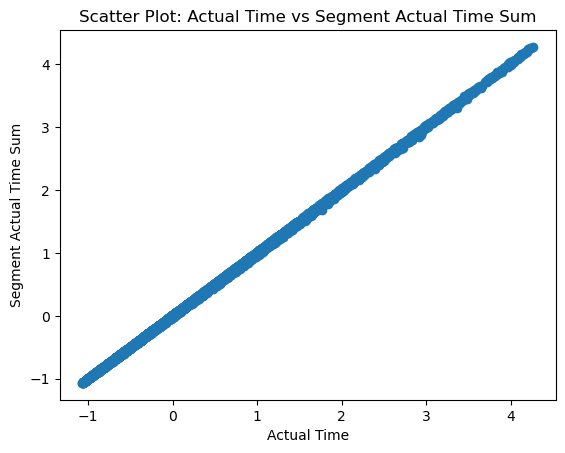

In [52]:
plt.scatter(trip['actual_time'], trip['segment_actual_time_sum'])
plt.xlabel('Actual Time')
plt.ylabel('Segment Actual Time Sum')
plt.title('Scatter Plot: Actual Time vs Segment Actual Time Sum')
plt.show()



* There is a strong positive linear relationship between Actual time and Segment actual time, indicating that there is no significant difference between the two variables. Statistically, the means of the two variables are found to be the same, leading to the conclusion of failing to reject the null hypothesis that the mean Actual time is equal to the mean Segment actual time.

### c. OSRM distance aggregated value and segment OSRM distance aggregated value.


In [53]:
# Null hypothesis (H0) : The mean osrm distance is equal to the mean segment osrm distance.
# Alternate hypothesis (Ha): The mean osrm distance is not equal to the mean segment osrm distance.

t_stat, p_value = ttest_ind(trip['osrm_distance'], trip['segment_osrm_distance_sum'])

# Print the results
print(f'T-Statistic value : {t_stat.round(4)} \nP-value {p_value.round(4)}')

# Set a significance level (alpha=0.05)
alpha = 0.05
# Decision based on p-value
if p_value <= alpha:
    print("Reject the null hypothesis: The mean osrm distance is not equal to the mean segment osrm distance.")
else:
    print("Fail to reject the null hypothesis: The mean osrm distance is equal to the mean segment osrm distance.")


T-Statistic value : 0.0 
P-value 1.0
Fail to reject the null hypothesis: The mean osrm distance is equal to the mean segment osrm distance.


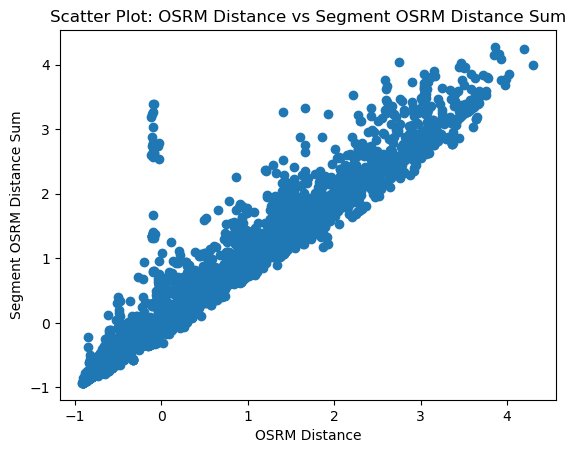

In [54]:
plt.scatter(trip['osrm_distance'], trip['segment_osrm_distance_sum'])
plt.xlabel('OSRM Distance')
plt.ylabel('Segment OSRM Distance Sum')
plt.title('Scatter Plot: OSRM Distance vs Segment OSRM Distance Sum')
plt.show()


### d. OSRM time aggregated value and segment OSRM time aggregated value.


In [55]:
# Null hypothesis (H0) : The mean osrm time is equal to the mean segment osrm time sum.
# Alternate hypothesis (Ha): The mean osrm time is not equal to the mean segment osrm time sum.

t_stat, p_value = ttest_ind(trip['osrm_time'], trip['segment_osrm_time_sum'])

# Print the results
print(f'T-Statistic value : {t_stat.round(4)} \nP-value {p_value.round(4)}')

# Set a significance level (alpha=0.05)
alpha = 0.05
# Decision based on p-value
if p_value <= alpha:
    print("Reject the null hypothesis: The mean osrm time is not equal to the mean segment osrm time sum.")
else:
    print("Fail to reject the null hypothesis: The mean osrm time is equal to the mean segment osrm time sum.")


T-Statistic value : -0.0 
P-value 1.0
Fail to reject the null hypothesis: The mean osrm time is equal to the mean segment osrm time sum.


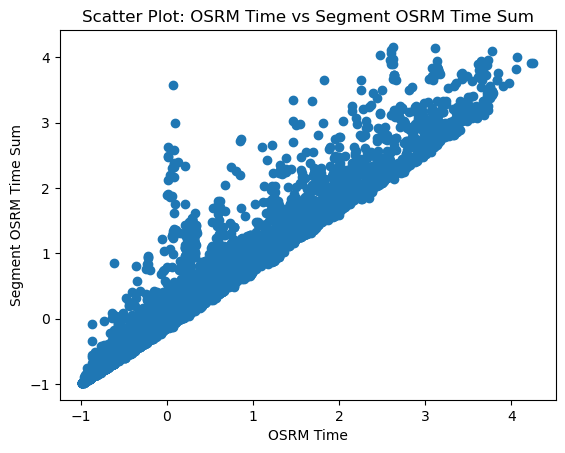

In [56]:
plt.scatter(trip['osrm_time'], trip['segment_osrm_time_sum'])
plt.xlabel('OSRM Time')
plt.ylabel('Segment OSRM Time Sum')
plt.title('Scatter Plot: OSRM Time vs Segment OSRM Time Sum')
plt.show()

**Insight:**
* T-Statistic: The T-Statistic value of 0.0 suggests that there is no difference in means between the groups being compared.
* P-Value: A P-value of 1.0 indicates that there is no statistically significant difference between the aggregated values. This suggests that, based on the information we have, there's no strong evidence to say that the two methods have significantly different average times.
* Scatter Plot Shape: The scatter plot shows a pattern where data points are not forming a clear straight line. This suggests that there might not be a strong linear relationship between 'actual time' and 'osrm time'.
* Actual time and segemnt actual time where data points are performing clear straight line. This suggests that there might be a strong linear relationship between 'actual time' and 'segemnt actual time'.

**Recommendations:**
* Since the test didn't find a significant difference, it means that, on average, the time calculated by the two methods is quite similar.

In [57]:
trip['trip_creation_time'].max()

Timestamp('2018-10-03 23:59:42.701692')

# Business Insights:
* The data is given from the period '2018-09-12 00:00:22.88' to '2018-10-03 23:59:42.70'
* There are a total of 12,369 unique trip UUIDs created, indicating that this many trips are present in the dataset.
* There are about 32 unique destination state, 1256 unique destination city, 778 unique destination place and 27 unique destination code.
* There are about 31 unique source state, 1260 unique source city, 1177 unique source place and 24 unique source code.
* Karnataka and Maharashtra serve as primary transportation hubs in Bangalore, with a higher number of trips originating from other states. Following this, Mumbai emerges as a bustling route. In Karnataka, Nelamangala stands out as the main destination, while Mumbai Central serves as the main destination in Mumbai.
* Most of the data is for testing than for training.
* Most common route type is Carting ( Handling system consisting of small vehicles (carts)).
* Features Actual Time vs Segment Actual Time are statistically similar.
* Features OSRM Distance vs Segment OSRM Distance are statistically different.
* OSRM Time vs Segment OSRM Time there is enough evidence to say that this both are different.
* Busiest Year: The dataset primarily consists of trips from the year 2018, with all 26,222 trips recorded during that year.
* Busiest Month: September (Month 9) stands out as the busiest month, with a significant number of trips recorded (23,054 trips). October (Month 10) follows with a comparatively smaller number of trips (3,168).
* Busiest Week: Week 38 appears to be the busiest week, accounting for 8,852 trips. The subsequent weeks 39, 37, and 40 also exhibit high activity with 7,905, 6,297, and 3,168 trips, respectively.
* Busiest Day of the Week: Wednesday is identified as the busiest day of the week, with 4,819 trips. Thursday and Friday closely follow with 3,795 and 3,718 trips, respectively.
* Busiest Day: The 18th day of the month is the busiest, recording 1,373 trips. Days 21, 13, 20, and 25 also exhibit high activity with similar trip counts.

**Recommendation:**
* Collect feedback from customers regarding their experience during trips. Analyze customer satisfaction metrics to identify areas for improvement and enhance overall service quality.
* Conduct a detailed analysis of routes to identify opportunities for optimization. Focus on routes with statistically significant differences in OSRM Time and Segment OSRM Time to enhance efficiency.
* Investigate the reasons behind the similarity observed in Actual Time vs. Segment Actual Time. Consider refining the segmentation process to ensure that segment-specific features contribute to better predictions.
* Look at the routes and see where we can make them more efficient. Some routes might be faster or slower than expected, so we want to make sure they are just right.
* Ask people about their trips and what they liked or didn't like. This helps us make sure our customers are happy and enjoy their rides.
* Think about going to new places where people might need transportation. Maybe there are new routes we can offer or places we can expand to.
* Most of the orders are coming from/reaching to states like Maharashtra, Karnataka, Haryana and Tamil Nadu. The existing corridors can be further enhanced to improve the penetration in these areas.